# ** Bitcoin Price Prediction based on US Dollar Index **
## using ML models: VAR, FacebookProphet

---



---


> Nowadays, because of the global recession bitcoin being used against the hedge against the US dollar. Therefore, my analysis of this type of project for forecasting bitcoin's price are based on bitcoin's volume and the US dollar prices as the best features to account bitcoin price. In this notebook, i used two ML models to analyze the relationship between these data sets and try to fit a model to forecast the price of Bitcoin using VAR and Facebook Prophet models, to see which model will be more successful.
The data are based on Yahoo Bitcoin History and US Dollar Index from Investing.com. Data were collected from 09/11/2017 to 11/01/2022. 




### Module Imports

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as smt
from matplotlib import pyplot as plt
from datetime import datetime as dt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import Data & Preprocessing

In [ ]:
#reading data into dataframes
bc = pd.read_csv("BTC-USD.csv", index_col=0, parse_dates=True)
usd = pd.read_csv("USD.csv", index_col=0, parse_dates=True)

In [ ]:
#displaying bitcoin dataframe
bc = bc.drop(bc.columns[[0,1,2,4]], axis=1)
bc.tail()

,Close,Volume
Date,,
2021-12-24,50822.195313,24367912228
2021-12-25,50429.859375,19030650914
2021-12-26,50809.515625,20964372926
2021-12-27,50640.417969,24324345758
2021-12-28,49224.550781,31456342016


In [ ]:
#displaying usd dataframe
usd = usd.drop(usd.columns[[1,2,3,4,5]], axis=1)
usd.head()

,Price
Date,
2021-12-28,96.215
2021-12-27,96.086
2021-12-23,95.985
2021-12-22,96.059
2021-12-21,96.489


In [ ]:
print(bc.shape)
print(usd.shape)

(1511, 2)
(1067, 1)


In [ ]:
bc.describe()

,Close,Volume
count,1511.000000,1.511000e+03
mean,18106.541113,2.518053e+10
std,17472.111531,2.103552e+10
min,3236.761719,2.923670e+09
25%,7171.057373,7.687134e+09
50%,9510.200195,2.113222e+10
75%,20468.216797,3.580014e+10
max,67566.828125,3.509679e+11


In [ ]:
usd.describe()

,Price
count,1067.000000
mean,94.667585
std,2.945808
min,88.505000
25%,92.503000
50%,94.768000
75%,97.014000
max,103.605000


In [ ]:
#create one dataframe
join = bc
for x in join.index.values:
    for x2 in usd.index.values:
        if x == x2:
            itemindex = np.where(usd.index==x2)[0][0]
            val = usd.at[x2, "Price"]
            join.at[x, 'Price'] = val
join.head()

,Close,Volume,Price
Date,,,
2017-11-09,7143.580078,3226249984,94.352
2017-11-10,6618.140137,5208249856,94.278
2017-11-11,6357.600098,4908680192,NaN
2017-11-12,5950.069824,8957349888,NaN
2017-11-13,6559.490234,6263249920,94.388


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5b5f0d1d0>,
      dtype=object)

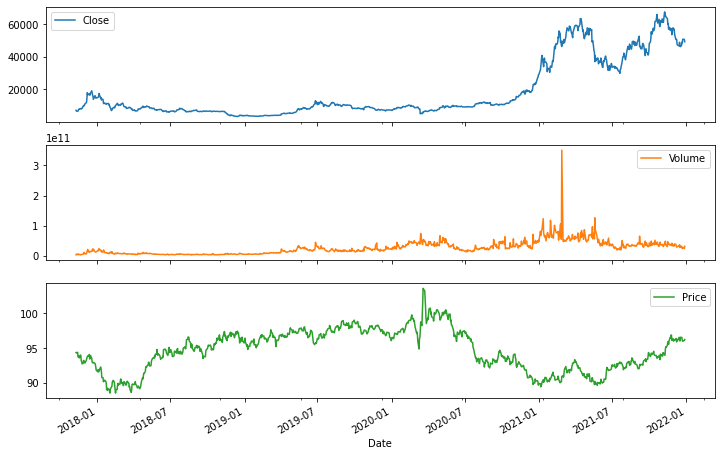

In [ ]:
join = join.dropna()
join.plot(subplots=True, figsize=(12,8))

Comparing the price of Bitcoin and the US dollar. Bitcoin's closing price spiked around 2017-2018, and the US dollar price that it takes a dip around that same time, so we see the relationship, bitcoin's price is surging the US dollar is declining. It can be a fact that it's a hedge against the US dollar. The same thing happened in 2021. Bitcoin's volume is increasing with some seasonality components and trends.

### Normalization & Transformation data

,Close,Volume,Price
0,0.510805,0.598101,0.478828
1,0.465679,0.500358,0.267194
2,0.528526,0.813587,0.585852
3,0.422778,0.636338,0.465991
4,0.355719,0.597960,0.348102
...,...,...,...
1060,0.473255,0.636405,0.426895
1061,0.398806,0.655097,0.357568
1062,0.493728,0.691847,0.515082
1063,0.401704,0.598476,0.476162


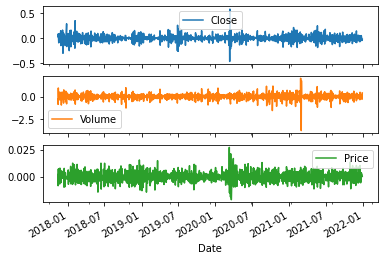

In [ ]:
#log transformation
# Converting the data to a logarithmic scale
log = pd.DataFrame(np.log(series))

# Differencing the log values
#1
log_diff = log.diff().dropna()
#2
log_diff = log_diff.diff().dropna()
log_diff.plot(subplots=True)

#normalization
#importing minmaxscaler 
from sklearn.preprocessing import MinMaxScaler

#creating minmaxscaler object
norm = MinMaxScaler()

#applying norm to dataframe
join_norm = pd.DataFrame(norm.fit_transform(log_diff), columns=log_diff.columns)
join_norm

Data should be ready to be feed into models.

In [ ]:
#Testing for stationality
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag= "AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num of Observations Used For ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)
        
ad_test(log_diff["Close"])
print("--------------------------------------------")
ad_test(log_diff["Volume"])
print("--------------------------------------------")
ad_test(log_diff["Price"])

1. ADF :  -11.86752280519606
2. P-Value :  6.621377910930982e-22
3. Num Of Lags :  21
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1043
5. Critical Values : 
	 1% :  -3.436635203238866
	 5% :  -2.8643150683130307
	 10% :  -2.568247558190521
--------------------------------------------
1. ADF :  -13.315337502341308
2. P-Value :  6.62046452951733e-25
3. Num Of Lags :  21
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1043
5. Critical Values : 
	 1% :  -3.436635203238866
	 5% :  -2.8643150683130307
	 10% :  -2.568247558190521
--------------------------------------------
1. ADF :  -13.220649107061005
2. P-Value :  1.0033684436411534e-24
3. Num Of Lags :  22
4. Num of Observations Used For ADF Regression and Critical Values Calculation :  1042
5. Critical Values : 
	 1% :  -3.43664125006105
	 5% :  -2.864317735333004
	 10% :  -2.5682489786730818


### VAR Model

VAR models (vector autoregressive models) are used for multivariate time series. The structure is that each variable is a linear function of past lags of itself and past lags of the other variables.

As an example suppose that we measure three different time series variables, denoted by 
x
t
,
1
, 
x
t
,
2
, and 
x
t
,
3
.


[More about VAR model](https://online.stat.psu.edu/stat510/lesson/11/11.2)

In [ ]:
# Splitting the dataset into train & test subsets
n_obs = 7
train, test = log_diff[:-n_obs], log_diff[-n_obs:]
log_diff.head()

,Close,Volume,Price
Date,,,
2017-11-13,0.067498,-0.294468,0.001951
2017-11-14,0.020460,-0.856907,-0.008236
2017-11-15,0.085970,0.945499,0.007102
2017-11-16,-0.024257,-0.074443,0.001333
2017-11-17,-0.094157,-0.295276,-0.004342


In [ ]:
# Fitting the VAR model
from statsmodels.tsa.api import VAR

model = VAR(log_diff)
results = model.fit(maxlags = 22, ic = 'aic')
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 15, Jan, 2022
Time:                     14:28:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -19.4054
Nobs:                     1043.00    HQIC:                  -19.9975
Log likelihood:           6378.53    FPE:                1.43975e-09
AIC:                     -20.3593    Det(Omega_mle):     1.19446e-09
--------------------------------------------------------------------
Results for equation Close
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.000477         0.001503           -0.317           0.751
L1.Close          -1.012177         0.032173          -31.461           0.000
L1.Volume          0.016394         0.007937            2.066           

Results of the VAR model

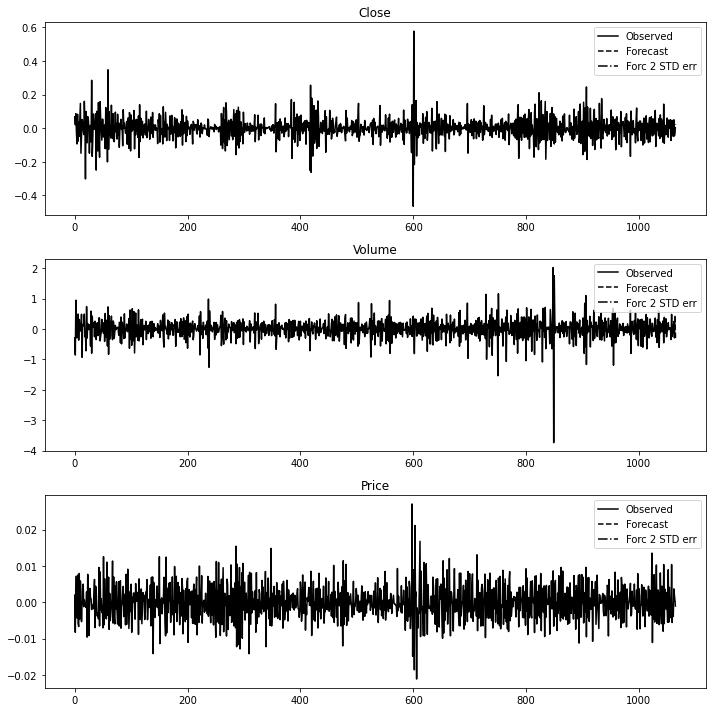

In [ ]:
lag_order = results.k_ar
predicted = results.forecast(log_diff.values[-lag_order:],n_obs)
forecast = pd.DataFrame(predicted, index = log_diff.index[-n_obs:], columns = log_diff.columns)


# Plotting the Forecasted values
p1 = results.plot_forecast(1)
p1.tight_layout()

In [ ]:
# Inverting the Differencing Transformation
def invert_transformation(df, df_forecast, second_diff):
    for col in df.columns:
        # Undo the 2nd Differencing
        if second_diff:
            df_forecast[str(col)] = (df[col].iloc[-1] - df[col].iloc[-2]) + df_forecast[str(col)].cumsum()
        # Undo the 1st Differencing
        df_forecast[str(col)] = df[col].iloc[-1] + df_forecast[str(col)].cumsum()

    return df_forecast

forecast_values = invert_transformation(train, forecast, second_diff=True)
forecast_values

,Close,Volume,Price
Date,,,
2021-12-17,-0.172139,-1.028691,-0.007520
2021-12-20,-0.264039,-1.519065,-0.010567
2021-12-21,-0.364481,-2.220749,-0.014104
2021-12-22,-0.467302,-2.767039,-0.015654
2021-12-23,-0.570723,-3.359581,-0.018138
2021-12-27,-0.678254,-3.942943,-0.020860
2021-12-28,-0.782299,-4.546018,-0.024634


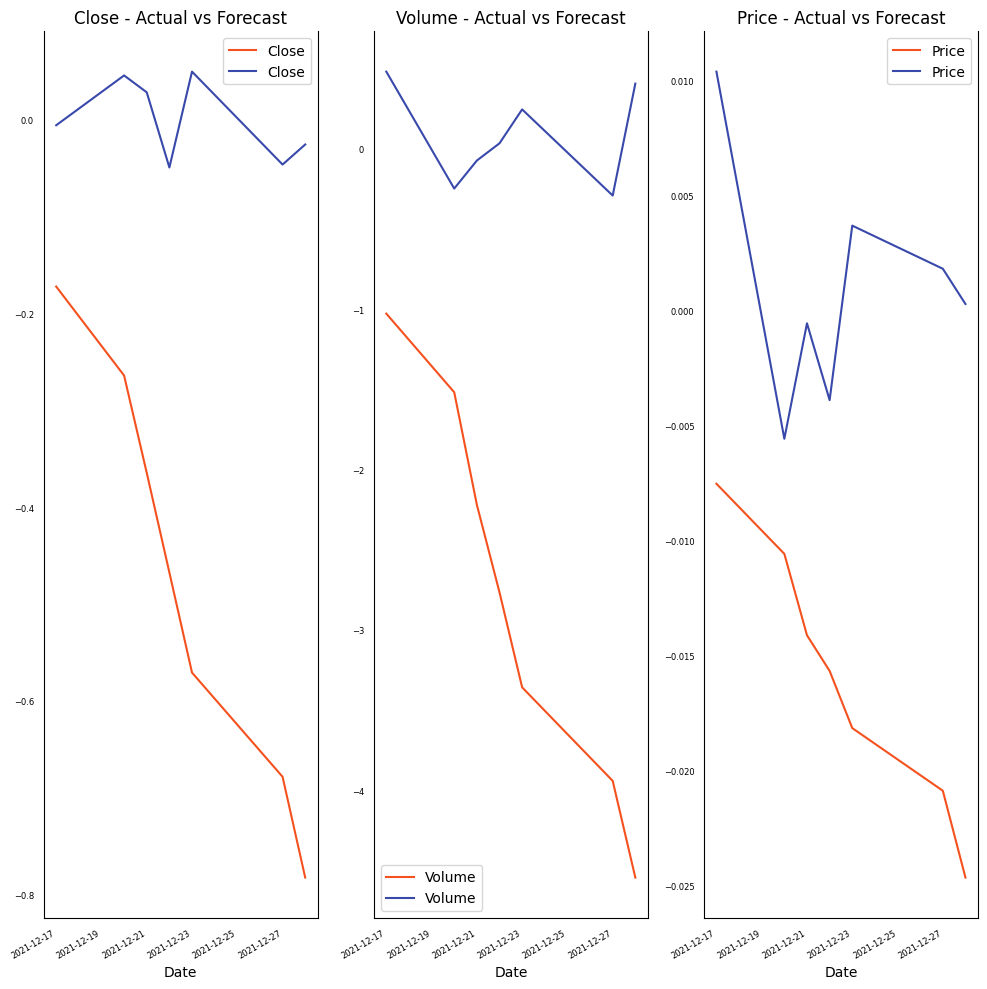

In [ ]:
# Actual vs Forecasted Plots
fig, axes = plt.subplots(nrows = int(len(log_diff.columns)/2), ncols = 3, dpi = 100, figsize = (10,10))

for i, (col,ax) in enumerate(zip(log_diff.columns, axes.flatten())):
    forecast_values[col].plot(color = '#F4511E', legend = True, ax = ax).autoscale(axis =' x',tight = True)
    test[col].plot(color = '#3949AB', legend = True, ax = ax)

    ax.set_title(col + ' - Actual vs Forecast')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize = 6)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from numpy import asarray as arr
mse = mean_squared_error(test, forecast_values)
print("\nMean Squared Error: ", mse)


Mean Squared Error:  3.2855201256277193


### Facebook Prophet Model

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

[More about Facebook Prophet](https://facebook.github.io/prophet/docs/quick_start.html#python-api)

In [ ]:
#importing prophet and fitting model
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
#functions to automate prophet charts for each series
def fit_model(df):
    m = Prophet(daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    return m, forecast, future

def fb_plots(m, fore):
    return plot_plotly(m, forecast)

def fb_subplots(m, fore):
    return m.plot(forecast), m.plot_components(forecast)

Forecast for BTC closing price for 2022

In [ ]:
bc = pd.read_csv("BTC-USD.csv")
bc_price = bc.drop(bc.columns[[1,2,3,5,6]], axis=1)
bc_vol = bc.drop(bc.columns[[1,2,3,4,5]], axis=1)
bc_price.columns = ["ds","y"]
bc_vol.columns = ["ds","y"]
bc_price.head()

,ds,y
0,2017-11-09,7143.580078
1,2017-11-10,6618.140137
2,2017-11-11,6357.600098
3,2017-11-12,5950.069824
4,2017-11-13,6559.490234


In [ ]:
model, forecast, future = fit_model(bc_price)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
future.tail()

,ds
1871,2022-12-24
1872,2022-12-25
1873,2022-12-26
1874,2022-12-27
1875,2022-12-28


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1871,2022-12-24,65554.507243,46040.959306,84895.742352
1872,2022-12-25,65784.559727,46107.277108,85555.468879
1873,2022-12-26,66050.166038,47471.914920,86160.740605
1874,2022-12-27,66256.539355,47254.566038,86713.401680
1875,2022-12-28,66616.662372,46480.667222,86612.122021


In [ ]:
#BTC price actual vs predicted plot
fb_plots(model, forecast)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

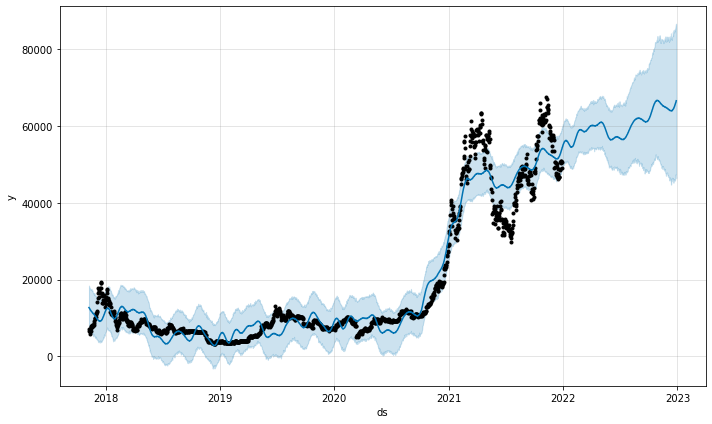

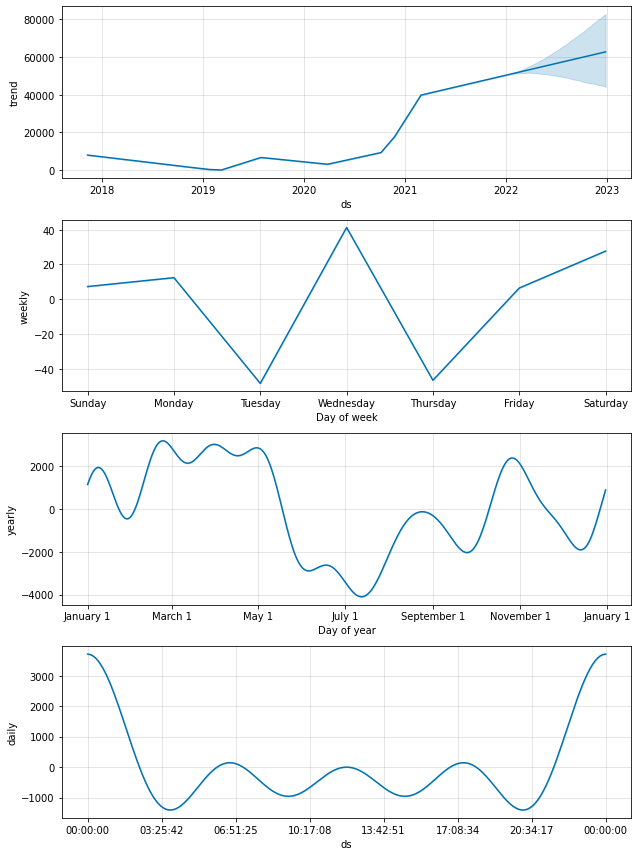

In [ ]:
#seasonality components plots
fb_subplots(model, forecast)

Forecast for BTC price for 2023

In [ ]:
bc = pd.read_csv("BTC-USD1.csv")
bc_price = bc.drop(bc.columns[[1,2,3,5,6]], axis=1)
bc_vol = bc.drop(bc.columns[[1,2,3,4,5]], axis=1)
bc_price.columns = ["ds","y"]
bc_vol.columns = ["ds","y"]
bc_price.head()

,ds,y
0,2017-11-09,7143.580078
1,2017-11-10,6618.140137
2,2017-11-11,6357.600098
3,2017-11-12,5950.069824
4,2017-11-13,6559.490234


In [ ]:
model, forecast, future = fit_model(bc_price)

In [ ]:
future.tail()

,ds
1885,2023-01-07
1886,2023-01-08
1887,2023-01-09
1888,2023-01-10
1889,2023-01-11


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1885,2023-01-07,59964.004247,39298.400241,78424.325626
1886,2023-01-08,60015.966748,39695.353889,77994.591857
1887,2023-01-09,60073.943210,39044.992093,78401.263475
1888,2023-01-10,60050.671935,40773.951227,78454.748068
1889,2023-01-11,60172.528433,40221.580174,78175.734665


In [ ]:
fb_plots(model, forecast)

Forecast for US dollar price for 2022

In [ ]:
usd = pd.read_csv("USD.csv")
usd_2 = pd.read_csv("USD1.csv")
usd = usd.drop(usd.columns[[2,3,4,5,6]], axis=1)
usd.columns = ["ds","y"]
usd.head()

,ds,y
0,"Dec 28, 2021",96.203
1,"Dec 27, 2021",96.086
2,"Dec 23, 2021",95.985
3,"Dec 22, 2021",96.059
4,"Dec 21, 2021",96.489


In [ ]:
model, forecast, future = fit_model(usd)


In [ ]:
future.tail()

,ds
1427,2022-12-24
1428,2022-12-25
1429,2022-12-26
1430,2022-12-27
1431,2022-12-28


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1427,2022-12-24,101.694966,79.345478,124.456658
1428,2022-12-25,101.678592,79.072095,124.460457
1429,2022-12-26,101.584704,78.929808,124.495556
1430,2022-12-27,101.573768,78.951332,124.787263
1431,2022-12-28,101.579420,78.722570,124.834569


In [ ]:
#US dollar price actual vs predicted plot
fb_plots(model, forecast)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

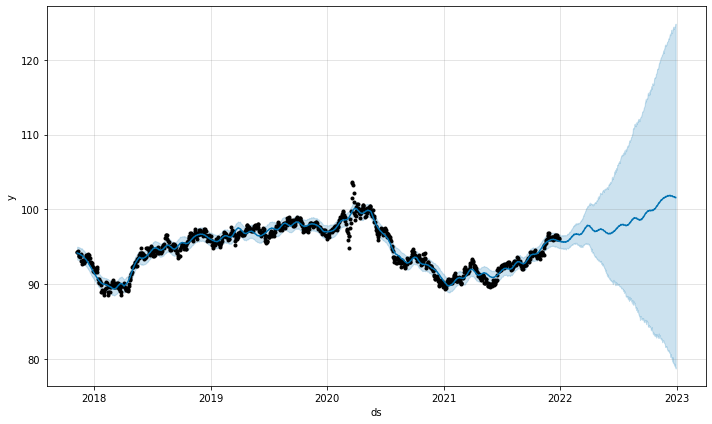

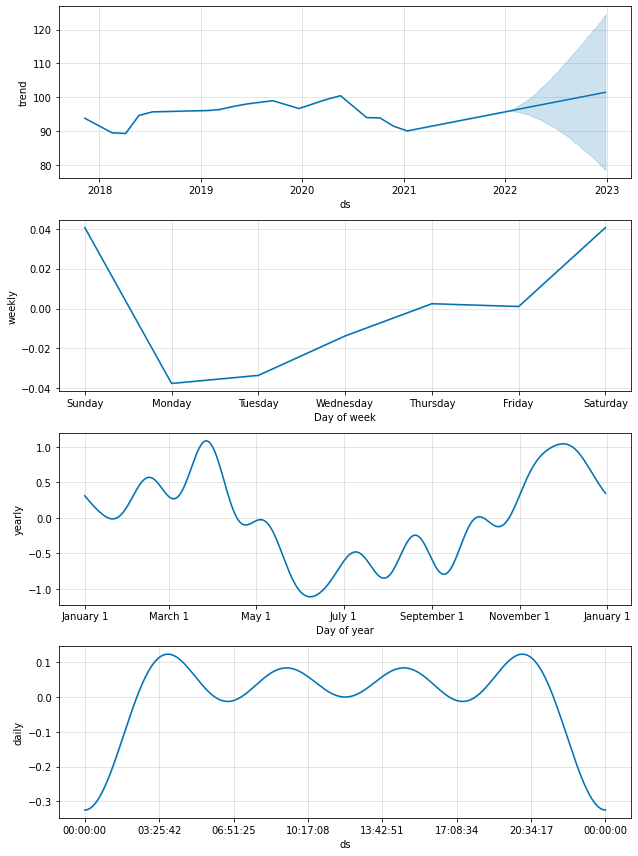

In [ ]:
#seasonality components plot
fb_subplots(model, forecast)

Forecast for US dollar price 2023

In [ ]:
usd_2 = usd_2.drop(usd_2.columns[[2,3,4,5,6]], axis=1)
usd_2.columns = ["ds","y"]
usd_2.head()


,ds,y
0,"Jan 11, 2022",95.700
1,"Jan 10, 2022",95.990
2,"Jan 07, 2022",95.722
3,"Jan 06, 2022",96.326
4,"Jan 05, 2022",96.182


In [ ]:
model, forecast, future = fit_model(usd_2)

In [ ]:
future.tail()

,ds
1437,2023-01-07
1438,2023-01-08
1439,2023-01-09
1440,2023-01-10
1441,2023-01-11


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1437,2023-01-07,101.498433,77.509761,125.295862
1438,2023-01-08,101.487946,77.484774,125.575070
1439,2023-01-09,101.394785,77.235011,124.903668
1440,2023-01-10,101.388013,77.005879,125.637653
1441,2023-01-11,101.397279,77.010863,125.511793


In [ ]:
fb_plots(model, forecast)

Forecast for BTC volume

In [ ]:
bc_vol.head()

,ds,y
0,2017-11-09,3226249984
1,2017-11-10,5208249856
2,2017-11-11,4908680192
3,2017-11-12,8957349888
4,2017-11-13,6263249920


In [ ]:
model, forecast, future = fit_model(bc_vol)

In [ ]:
future.tail()

,ds
1885,2023-01-07
1886,2023-01-08
1887,2023-01-09
1888,2023-01-10
1889,2023-01-11


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1885,2023-01-07,3.511201e+09,-2.616884e+10,3.085784e+10
1886,2023-01-08,3.518947e+09,-2.646189e+10,3.360585e+10
1887,2023-01-09,6.696432e+09,-2.298645e+10,3.540933e+10
1888,2023-01-10,6.782310e+09,-2.415533e+10,3.549027e+10
1889,2023-01-11,7.460543e+09,-2.473208e+10,3.811580e+10


In [ ]:
#BTC volume actual vs predicted plot
fb_plots(model, forecast)

(<Figure size 720x432 with 1 Axes>, <Figure size 648x864 with 4 Axes>)

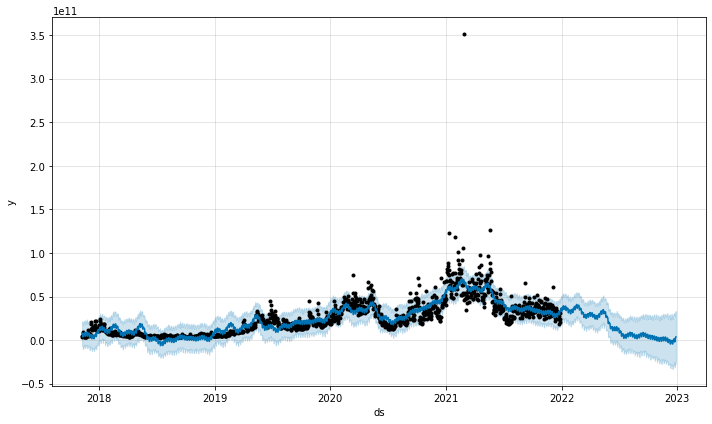

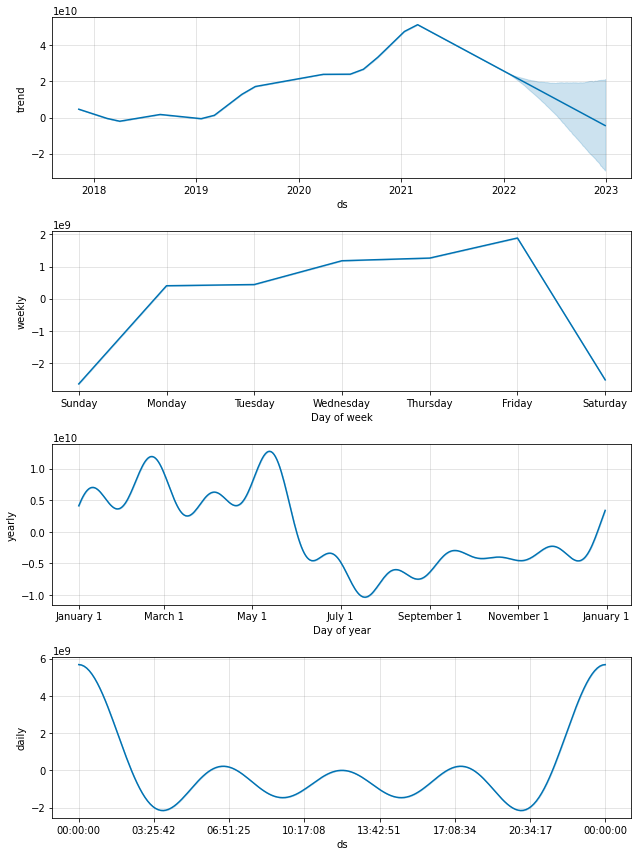

In [ ]:
#seasonality components plot
fb_subplots(model, forecast)